In [1]:
# Finding the type of model to buld:
#     Supervised, Unsupervised, or Reinforcement Learning? => this case Supervised, data is already given.
#     Classification task or Regression task? => Regression task because the output is mostly numerical
#     Batch learning or online learning techniques? => Batch Learning, all the data are ready
    
# Selecting A Performance Measure:
#     Supervised, Unsupervised, or Reinforcement Learning
#     RMSE, Mean Value Error, or Manhattan Norm


In [2]:
# DATA Categorical Variables:
#     1. CRIM:      per capita crime rate by town
#     2. ZN:        proportion of residential land zoned for lots over 25000 sq.ft.
#     3. INDUS:     proportion of non-retail business acres per town
#     4. CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#     5. NOX:        nitric oxides concentration (parts per 10 million)
#     6. RM:        average number of rooms per dwelling
#     7. AGE:       proportion of owner-occupied units built prior to 1940
#     8. DIS:       weighted distances to five Boston employment centres
#     9. RAD:       index of accessibility to radial highways
#    10. TAX:       full-value property-tax rate per $100
#    11. PTRATIO:   pupil-teacher ratio by town
#    12. B:         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#    13. LSTAT:     % lower status of the population
#    14. MEDV:      Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
housing = pd.read_csv('housedata.csv')
housing.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,S-TRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [5]:
housing.info()   # No missing data, except the RM (room) which lacks a data value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM        506 non-null float64
ZN          506 non-null float64
INDUS       506 non-null float64
CHAS        506 non-null int64
NOX         506 non-null float64
RM          505 non-null float64
AGE         506 non-null float64
DIS         506 non-null float64
RAD         506 non-null int64
TAX         506 non-null int64
S-TRATIO    506 non-null float64
B           506 non-null float64
LSTAT       506 non-null float64
MEDV        506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,S-TRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281170,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.698975,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157cc748>,
      dtype=object)

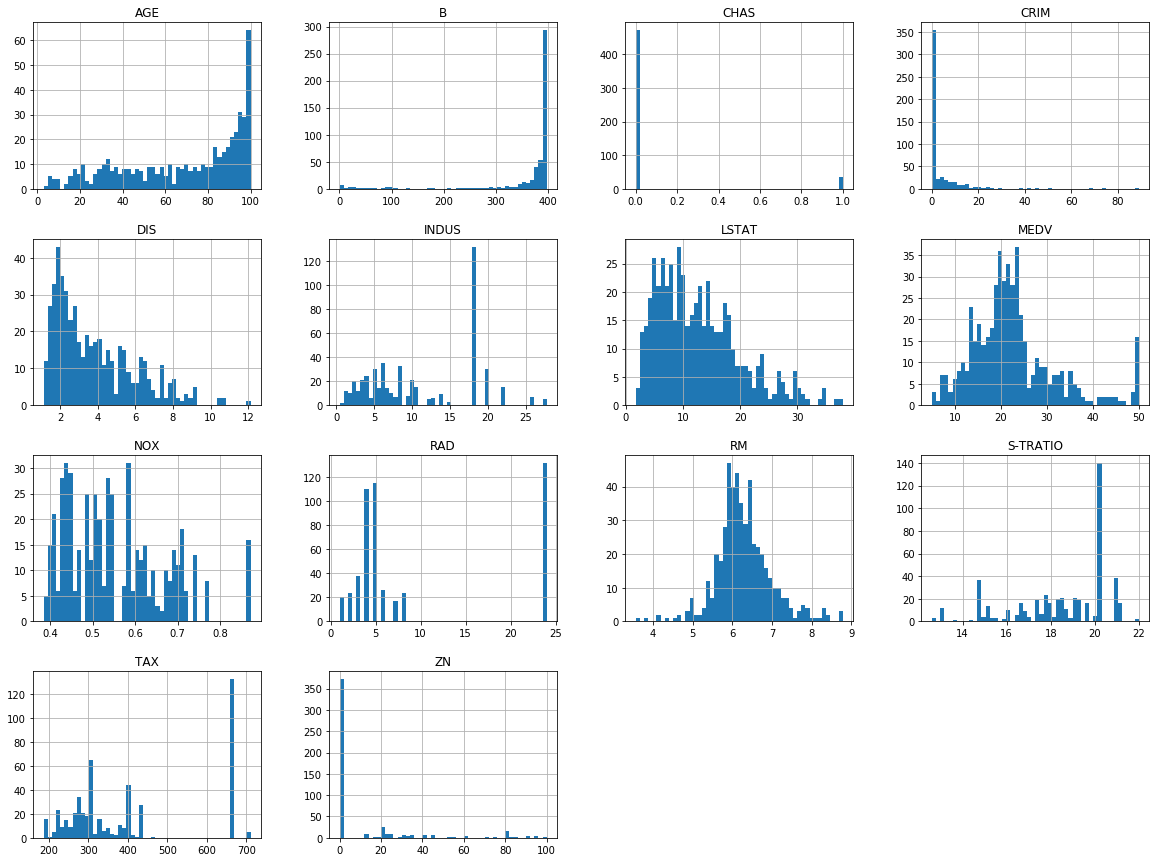

In [8]:
housing.hist(bins = 50, figsize = (20, 15))

## Train-Test Splitting. This is How sklearn_model_selection train_test_split work

In [9]:
# FOR LEARNING PURPOSE

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

# print(f"Rows in the train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" ) 

# Output:
#     Rows in the train set: 405
#     Rows in test set: 101

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in the train set: {len(train_set)}\nRows in test set: {len(test_set)}\n" ) 

Rows in the train set: 404
Rows in test set: 102



In [11]:
# Evenly distributing the attribute 'CHAS' to train and test test.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [12]:
# strat_test_set.describe
# strat_test_set.info()
# strat_test_set['CHAS'].value_counts() => 0: 95, 1: 7     95/7 = 13.57142857    

#strat_train_set['CHAS'].value_counts() => 0: 376, 1: 28    376/28 = 13.57142857

# The ratio of both are same. This is what StratifiedShuffleSplit is

In [13]:
housing = strat_train_set.copy()

## Looking for Correlation

In [14]:
#Pearson Correlation Coefficient
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

# Room numbers have a very strong correlation with the housing price
# if the room numbers change, effect on the median price will come quick.


MEDV        1.000000
RM          0.674243
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
S-TRATIO   -0.493534
LSTAT      -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1952a6d8>,
      dtype=object)

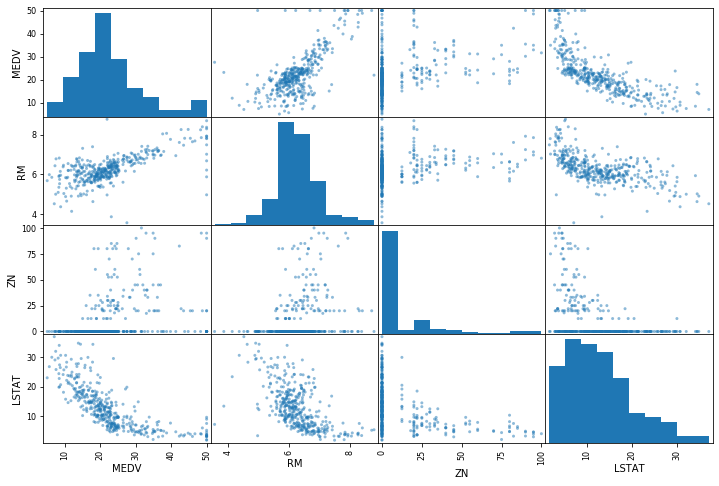

In [15]:
from pandas.plotting import scatter_matrix

# Interested variables
attributes = ['MEDV','RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12, 8))

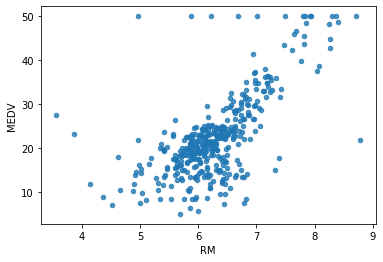

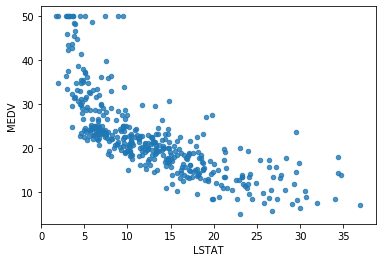

In [16]:
# Strong correlations between MEDV and LSTAT, and MEDV and RM
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
housing.plot(kind="scatter", x="LSTAT", y="MEDV", alpha=0.8)

## Trying Out Attributes Combinations

In [17]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [18]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,S-TRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.674243
B           0.361761
ZN          0.339741
DIS         0.240451
CHAS        0.205066
AGE        -0.364596
RAD        -0.374693
CRIM       -0.393715
NOX        -0.422873
TAX        -0.456657
INDUS      -0.473516
S-TRATIO   -0.493534
TAXRM      -0.522615
LSTAT      -0.740494
Name: MEDV, dtype: float64

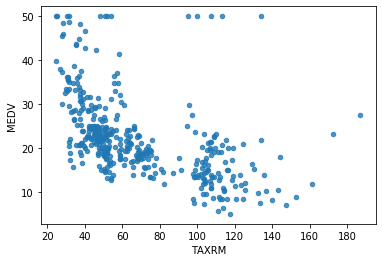

In [20]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [21]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_price = strat_train_set["MEDV"].copy()
housing_price

# 'housing labels' => price

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
411    17.2
250    24.4
100    27.5
429     9.5
57     31.6
413    16.3
115    18.3
490     8.1
199    34.9
494    24.5
142    13.4
113    18.7
468    19.1
400     5.6
247    20.5
151    19.6
408    17.2
68     17.4
365    27.5
81     23.9
93     25.0
456    12.7
116    21.2
27     14.8
234    29.0
       ... 
433    14.3
430    14.5
479    21.4
438     8.4
38     24.7
18     20.2
97     38.7
266    30.7
133    18.4
449    13.0
477    12.0
171    19.1
180    39.8
158    24.3
279    35.1
109    19.4
82     24.8
386    10.5
418     8.8
126    15.7
446    14.9
101    26.5
277    33.1
405     5.0
367    23.1
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

## Missing Attributes 

In [22]:
# If there are missing attributes, 3 options to take care of them:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute (drop the entire column)
#     3. Set the value to some values (0, mean, or median)

In [23]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(403, 13)

In [24]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the 
#original housing dataframe will remain unchanged

(404, 12)

In [25]:
median = housing["RM"].median() # Compute median for Option 3

In [26]:
housing["RM"].fillna(median) # Option 3
#Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
housing.shape

(404, 13)

In [28]:
housing.describe() # Before started filling out the missing attribute

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,S-TRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275556,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.708475,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(housing)

In [32]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,S-TRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275391,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.707603,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primarily, 3 types of objects:
1. Estimators - It estimates some parameter based on a dataset. (i.e imputer which use to fill missing attributes 
    with median. It has a fit and transform method. Fit method - Fits the dataset and calculates internal parameters.

                                                                 
2. Transformers - Takes input and returns output based on the learnings from fit(). It also has a convenience
    function called fit_transform() which fits and then transform.
                                                                 
                                                                 
3. Predictors - LinearRegression model is an example of predictor. fit() and predict are two common functions.
    It also gives score() function which will evaluate the predictions


## Feature Scaling

Primarily 2 types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - minimum)/(max-min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [34]:
housing_num_tr = my_pipeline.fit_transform(housing)
print(housing_num_tr)
housing_num_tr.shape

[[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]


(404, 13)

## Selecting a desired model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
# model = RandomForestRegressor()
# model = RandomForestClassifier()
# model = LinearRegression()
model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_price)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
some_data = housing.iloc[:5]

In [37]:
some_price = housing_price.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [40]:
list(some_price)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_price, housing_predictions)
rmse = np.sqrt(mse)

In [42]:
rmse

0.0

## Using Better Evaluation Technique => Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_price, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [44]:
rmse_scores

array([3.73160529, 5.79250988, 6.04684961, 4.85421617, 4.09099621,
       4.07884788, 8.23641305, 3.94879729, 3.49413795, 3.45257151])

In [45]:
def print_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

In [46]:
print_scores(rmse_scores)

Scores: [3.73160529 5.79250988 6.04684961 4.85421617 4.09099621 4.07884788
 8.23641305 3.94879729 3.49413795 3.45257151]
Mean: 4.772694483777194
Standard Deviation: 1.4406153998817317


## Saving the model

In [47]:
from joblib import dump, load
dump(model, 'realestate.joblib')

['realestate.joblib']

## Testing the model on test data

In [48]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Actual Units: \n {final_predictions}", "\n\n", f"Corresponding Predictive Units: \n {list(Y_test)}")

Actual Units: 
 [28.4 10.9 29.  23.3 20.  13.9 23.7 11.3 34.7 46.7 21.7 11.9 23.1 20.8
 19.  11.5 34.7 15.6 23.1 16.6 19.6 14.3 10.9 23.1 16.1 31.2 17.1 33.1
 10.2 32.7 20.  20.6 22.6 10.9 22.3  8.3 48.8 20.5 25.  43.8 25.  23.3
 19.5 19.4 16.2 31.7 44.8 19.  20.6 18.6 22.7 13.1 21.7 17.  28.6 31.7
 44.8 30.8 17.4 19.9 43.8  6.3 17.5 28.7 16.7 28.7 16.1 13.4 21.4 36.4
 22.5 22.6 19.3 23.9 28.7 13.3 16.4 18.2 20.9 18.9 22.9 19.9 13.4 20.5
 23.3 21.2  9.7 23.1 25.  22.9 17.5 22.   5.  29.1 21.9 31.1 24.5 28.7
  8.5 28.6 22.  18.8] 

 Corresponding Predictive Units: 
 [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.

In [49]:
final_rmse

3.8900955177546606

In [50]:
prepared_data[1]

array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.50883718, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])

## Using the model

In [55]:
from joblib import dump, load
import numpy as np
model = load('realestate.joblib')

inputs = np.array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.0970883718, -1.3938808 ,  2.19312325, -0.05766683, -0.08557904,
       -0.69277865,  0.39131918, -0.94116739])
model.predict([inputs])

array([24.6])

In [52]:
from sklearn import tree
#import pydotplus
#from sklearn.datasets import load_iris
#import collections

# print(list(housing_labels))
tree.export_graphviz(model, out_file='realestatemodel.dot', feature_names=['CRIM','ZN',
                    'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','S-TRATIO',
                    'B','LSTAT'], class_names=housing_price, label='all', rounded=True, 
                     filled=True)